In [1]:
k = 4 
d = 3 
n = 7 

codeword = [0, 0, 0, 0, 0, 0, 0]

p_values = [0.01, 0.05, 0.07, 0.1, 0.2, 0.5]

In [2]:
def calc_error_prob(p):
    num_errors = 0
    num_iterations = 1000
    
    for i in range(num_iterations):
        received_word = [bit if random() > p else 1-bit for bit in codeword]
        
        syndrome = [sum([received_word[j] for j in range(len(received_word)) if (j+1) & (1<<k)]) % 2 for k in range(d)]
        
        if any(syndrome):
            num_errors += 1
            error_bit = sum([2**i*syndrome[i] for i in range(d)])
            received_word[error_bit-1] = 1 - received_word[error_bit-1]
            
    return N(num_errors/num_iterations, digits = 3)

error_probs = [calc_error_prob(p) for p in p_values]

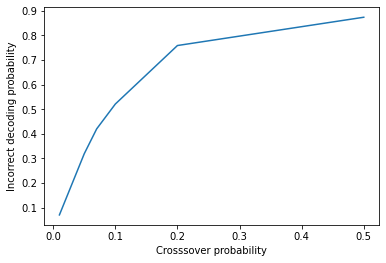

[0.0700, 0.319, 0.420, 0.521, 0.759, 0.874]


In [3]:
import matplotlib.pyplot as plt
plt.plot(p_values, error_probs)
plt.xlabel('Crosssover probability')
plt.ylabel('Incorrect decoding probability')
plt.show()
print(error_probs)